In [5]:
%matplotlib notebook

import numpy
import sys
import os
import pickle
import importlib
# import sympy

import matplotlib.pyplot as plt
print(sys.version)
print(os.getcwd())


sys.path.append('../human-guidance-subgoal-planning-py/')
import SubgoalGraph as SG
import perceptual_guidance as pg

from mpl_toolkits.mplot3d import Axes3D

# from rigidbody import pr, rotation, SE3
# from triangulation import triangulate

from IPython.display import display, HTML

numpy.__version__

3.6.2 |Anaconda, Inc.| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]
D:\Dropbox\Projects\Human Guidance\Analysis\Subgoal Planning\human-guidance-subgoal-planning-py


'1.13.1'

In [6]:
importlib.reload(SG)

sg = SG.SubgoalGraph()

# set the guidance function
# set the obstacles
plist = SG.generate_obstacles(n=8, r=[3, 20])

plist

obsdata = {
    "num": [],
    "xpos": [],
    "ypos": []
}
for i,pi in enumerate(plist):
    for j in range(4):
        obsi = {
            "num": i,
            "xpos": pi[j,0],
            "ypos": pi[j,1]
        }
        obsdata["num"].append(i)
        obsdata["xpos"].append(pi[j,0])
        obsdata["ypos"].append(pi[j,1])
obsdata['num'] = numpy.array(obsdata['num'])
obsdata['xpos'] = numpy.array(obsdata['xpos'])
obsdata['ypos'] = numpy.array(obsdata['ypos'])

<IPython.core.display.Javascript object>


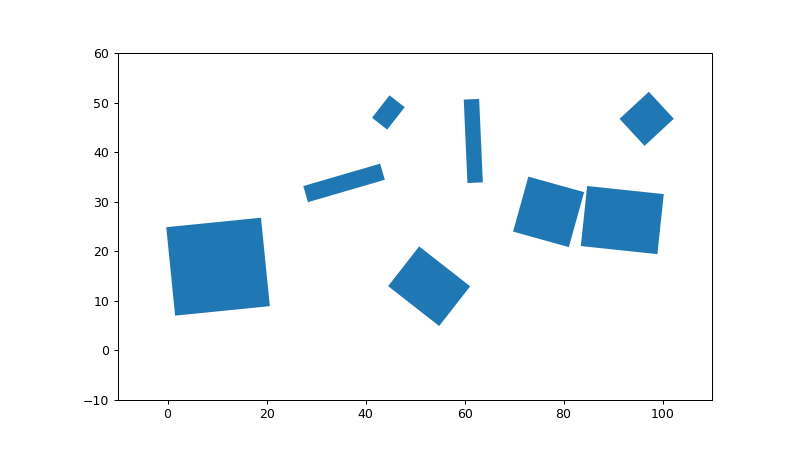

In [7]:
from matplotlib.patches import Polygon

def plot_obs(plist, ax=None):
    if ax is None:
        f, ax = plt.subplots(1,1, figsize=(9,5))

    for pl in plist:
        plg = Polygon(pl, closed=True)
        ax.add_patch(plg)

    ax.set_xlim([-10, 110])
    ax.set_ylim([-10, 60])
    plt.show()
    ax.set_aspect('equal')
    
plot_obs(plist)

In [4]:
import pandas

pdata = []
for i,pl in enumerate(plist):
    for p in pl:
        pi = {'num':i+1, 'xpos':p[0], 'ypos':p[1]}
        pdata.append(pi)
        
pandas.DataFrame(pdata).to_csv('./largeobstacles.csv')


<IPython.core.display.Javascript object>


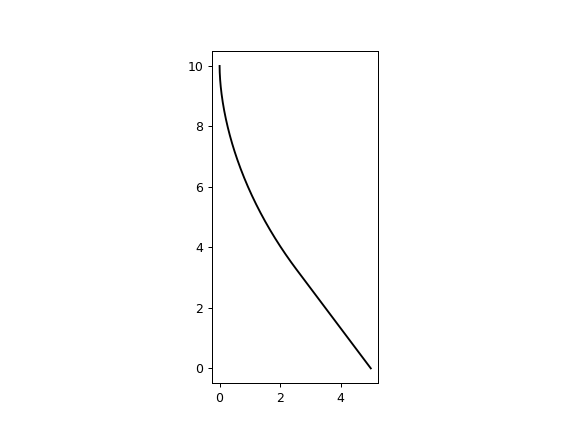

[{'verts': array([[ 61.12569646,  12.86595736],
       [ 50.81727258,  20.92521901],
       [ 44.54682836,  12.90483207],
       [ 54.85525224,   4.84557042]]), 'mean': array([ 52.83626241,  12.88539472]), 'sgp': [array([ 61.62569508,  12.86478495]), array([ 50.69549199,  21.41016178]), array([ 44.04682974,  12.90600449]), array([ 54.97703282,   4.36062765])]}, {'verts': array([[ 20.6503612 ,   8.85759394],
       [ 18.86224746,  26.72280698],
       [ -0.2781369 ,  24.80706244],
       [  1.50997684,   6.9418494 ]]), 'mean': array([ 10.18611215,  16.83232819]), 'sgp': [array([ 21.04804091,   8.5545249 ]), array([ 19.19197231,  27.09868133]), array([ -0.67581661,  25.11013149]), array([ 1.18025199,  6.56597506])]}, {'verts': array([[ 47.89698766,  49.05596972],
       [ 44.82883198,  51.45028842],
       [ 41.29129832,  46.91718093],
       [ 44.35945399,  44.52286224]]), 'mean': array([ 44.59414299,  47.98657533]), 'sgp': [array([ 48.37267503,  49.20998768]), array([ 44.86263272,  51.

D:\Dropbox\Projects\Human Guidance\Analysis\Subgoal Planning\human-guidance-subgoal-planning-py\SubgoalGraph.py:493: RuntimeWarning: invalid value encountered in true_divide
  u_a = numpy.divide(numerator_a, denominator)
D:\Dropbox\Projects\Human Guidance\Analysis\Subgoal Planning\human-guidance-subgoal-planning-py\SubgoalGraph.py:494: RuntimeWarning: divide by zero encountered in true_divide
  u_b = numpy.divide(numerator_b, denominator)
D:\Dropbox\Projects\Human Guidance\Analysis\Subgoal Planning\human-guidance-subgoal-planning-py\SubgoalGraph.py:500: RuntimeWarning: invalid value encountered in greater_equal
  int_b = numpy.logical_and.reduce([(u_a >= 0), (u_a <= 1), (u_b >= 0), (u_b <= 1)])
D:\Dropbox\Projects\Human Guidance\Analysis\Subgoal Planning\human-guidance-subgoal-planning-py\SubgoalGraph.py:500: RuntimeWarning: invalid value encountered in less_equal
  int_b = numpy.logical_and.reduce([(u_a >= 0), (u_a <= 1), (u_b >= 0), (u_b <= 1)])


In [8]:
importlib.reload(pg)
importlib.reload(SG)

sg = SG.SubgoalGraph()
""
x0 = numpy.array([5, 0])
xg = numpy.array([0, 10, 0.0, 1])
guidparam = {
    'k': 0.78,
    'turning_only': False
}

traj, gparam = pg.fp_global_guidance(x0, xg, guidparam)

gparam, traj

f, ax = plt.subplots(1,1)

# plot_obs(plist, ax=ax)
ax.plot(traj['x'][:,0], traj['x'][:,1], 'k-')
#ax.set_xlim([-5, 5])
ax.set_aspect('equal')

sg.get_obs(obsdata)

print(sg.C)

it, ob = SG.intersects(traj['x'], sg.C)


print(it, ob)

print('Cost:', -traj['tt'][0])

# for obi in seg:
#     obii = int(obi)
#     print(obii)
#     ax.plot(traj['x'][obii:obii+2,0], traj['x'][obii:obii+2,1], 'r.')

print(traj['v'])

In [9]:
importlib.reload(SG)
importlib.reload(pg)

sg = SG.SubgoalGraph()
sg.get_obs(obsdata)
sg._get_sgcand()

sg._set_start(numpy.array([70, -10]))

goal = {}
goal = sg._create_node(numpy.array([60, 60]), id=0)
goal['state'] = numpy.array([0.0, 1])
goal['gcost'] = 0.0

sg.startid = 0
guidparam = {
    'k': 0.78,
    'turning_only': False
}


def pred_traj(pos, state):
    # state = numpy.stack([pos.reshape(2,), state.reshape(2,)])
    return pg.fp_global_guidance(pos, state, guidparam)[0]

sg.set_function(pred_traj)


# print("sg cand", sg.sg_cand)

sg.a_star_search(goal)

starting search...
subgoals:
{'pos': array([ 61.62569508,  12.86478495]), 'state': [], 'fcost': inf, 'gcost': inf, 'hcost': inf, 'neighbors': [], 'opened': False, 'closed': False, 'next': 0, 'obstructed': array([], dtype=float64), 'edge': 0, 'isstart': False, 'id': 1}
{'pos': array([ 50.69549199,  21.41016178]), 'state': [], 'fcost': inf, 'gcost': inf, 'hcost': inf, 'neighbors': [], 'opened': False, 'closed': False, 'next': 0, 'obstructed': array([], dtype=float64), 'edge': 0, 'isstart': False, 'id': 2}
{'pos': array([ 44.04682974,  12.90600449]), 'state': [], 'fcost': inf, 'gcost': inf, 'hcost': inf, 'neighbors': [], 'opened': False, 'closed': False, 'next': 0, 'obstructed': array([], dtype=float64), 'edge': 0, 'isstart': False, 'id': 3}
{'pos': array([ 54.97703282,   4.36062765]), 'state': [], 'fcost': inf, 'gcost': inf, 'hcost': inf, 'neighbors': [], 'opened': False, 'closed': False, 'next': 0, 'obstructed': array([], dtype=float64), 'edge': 0, 'isstart': False, 'id': 4}
{'pos': arr

D:\Dropbox\Projects\Human Guidance\Analysis\Subgoal Planning\human-guidance-subgoal-planning-py\SubgoalGraph.py:493: RuntimeWarning: invalid value encountered in true_divide
  u_a = numpy.divide(numerator_a, denominator)
D:\Dropbox\Projects\Human Guidance\Analysis\Subgoal Planning\human-guidance-subgoal-planning-py\SubgoalGraph.py:494: RuntimeWarning: divide by zero encountered in true_divide
  u_b = numpy.divide(numerator_b, denominator)
D:\Dropbox\Projects\Human Guidance\Analysis\Subgoal Planning\human-guidance-subgoal-planning-py\SubgoalGraph.py:500: RuntimeWarning: invalid value encountered in greater_equal
  int_b = numpy.logical_and.reduce([(u_a >= 0), (u_a <= 1), (u_b >= 0), (u_b <= 1)])
D:\Dropbox\Projects\Human Guidance\Analysis\Subgoal Planning\human-guidance-subgoal-planning-py\SubgoalGraph.py:500: RuntimeWarning: invalid value encountered in less_equal
  int_b = numpy.logical_and.reduce([(u_a >= 0), (u_a <= 1), (u_b >= 0), (u_b <= 1)])



 => possible
testing traj from [ 60.49778461  33.2315045 ] to [60 60] [ 0.  1.]
 => obstructed
testing traj from [ 69.35163965  23.6758547 ] to [60 60] [ 0.  1.]
 => obstructed
testing traj from [ 61.62569508  12.86478495] to [60 60] [ 0.  1.]
 => obstructed
testing traj from [ 72.62774039  35.457913  ] to [60 60] [ 0.  1.]
 => obstructed
testing traj from [ 50.69549199  21.41016178] to [60 60] [ 0.  1.]
 => possible
testing traj from [ 54.97703282   4.36062765] to [60 60] [ 0.  1.]
 => obstructed
testing traj from [ 81.30311381  20.35264645] to [60 60] [ 0.  1.]
 => obstructed
testing traj from [ 48.37267503  49.20998768] to [60 60] [ 0.  1.]
 => possible
testing traj from [ 83.04678536  20.73634631] to [60 60] [ 0.  1.]
 => obstructed
testing traj from [ 44.37715821  34.42827975] to [60 60] [ 0.  1.]
 => possible
testing traj from [ 84.57921455  32.13470475] to [60 60] [ 0.  1.]
 => obstructed
testing traj from [ 84.39476331  33.48167668] to [60 60] [ 0.  1.]
 => obstructed
testing 

updating sg 20 next from 28 to 25
open list [(18, 17.846759850000097), (9, 17.987242088230683), (19, 18.656419111311788), (12, 19.522884783754829), (1, 19.590020014380549), (2, 20.033634904246892), (21, 20.077489095367749), (22, 20.13725914015097), (14, 21.060492164330292), (17, 21.117144927224807), (33, 22.479999999999759), (20, 22.937788290057437), (31, 24.878296098428393)]
opening: 18 17.84675985
testing traj from [ 70 -10] to [ 72.62774039  35.457913  ] [-1.10140009  1.66940643]
 => obstructed
testing traj from [ 69.35163965  23.6758547 ] to [ 72.62774039  35.457913  ] [-1.10140009  1.66940643]
 => obstructed
testing traj from [ 61.62569508  12.86478495] to [ 72.62774039  35.457913  ] [-1.10140009  1.66940643]
 => obstructed
testing traj from [ 81.30311381  20.35264645] to [ 72.62774039  35.457913  ] [-1.10140009  1.66940643]
 => obstructed
testing traj from [ 83.04678536  20.73634631] to [ 72.62774039  35.457913  ] [-1.10140009  1.66940643]
 => obstructed
testing traj from [ 63.79

testing traj from [ 54.97703282   4.36062765] to [ 69.35163965  23.6758547 ] [-0.27144084  1.98149435]
 => possible
testing traj from [ 83.04678536  20.73634631] to [ 69.35163965  23.6758547 ] [-0.27144084  1.98149435]
 => possible
testing traj from [ 63.79467431  33.37769775] to [ 69.35163965  23.6758547 ] [-0.27144084  1.98149435]
 => possible
testing traj from [ 99.30647055  19.01668141] to [ 69.35163965  23.6758547 ] [-0.27144084  1.98149435]
 => possible
updating sg 20 next from 25 to 19
updating sg 4 next from 0 to 19
updating sg 15 next from 0 to 19
updating sg 16 next from 0 to 19
open list [(12, 19.522884783754829), (1, 19.590020014380549), (2, 20.033634904246892), (21, 20.077489095367749), (22, 20.13725914015097), (14, 21.060492164330292), (17, 21.117144927224807), (33, 22.479999999999759), (20, 22.917788290057437), (15, 23.798148223630264), (4, 24.216523399894818), (31, 24.878296098428393), (16, 31.728241064389689)]
opening: 12 19.5228847838
testing traj from [ 70 -10] to [ 

 => obstructed
testing traj from [ 48.37267503  49.20998768] to [ 50.69549199  21.41016178] [ 0.76424989  1.84822134]
 => obstructed
testing traj from [ 40.81561095  46.76316297] to [ 50.69549199  21.41016178] [ 0.76424989  1.84822134]
 => obstructed
testing traj from [ 59.70654108  51.07530145] to [ 50.69549199  21.41016178] [ 0.76424989  1.84822134]
 => obstructed
testing traj from [ 63.00343078  51.2214947 ] to [ 50.69549199  21.41016178] [ 0.76424989  1.84822134]
 => possible
updating sg 24 next from 0 to 2
open list [(21, 20.077489095367749), (22, 20.13725914015097), (14, 21.060492164330292), (17, 21.117144927224807), (11, 21.925242238091055), (4, 22.436523399894931), (33, 22.479999999999759), (20, 22.917788290057437), (15, 23.798148223630264), (31, 24.878296098428393), (10, 25.170989122686663), (23, 26.246175370029867), (16, 31.728241064389689), (24, 34.22103043964016)]
opening: 21 20.0774890954
testing traj from [ 70 -10] to [ 44.37715821  34.42827975] [ 1.3811918   1.44648166]


testing traj from [ 84.57921455  32.13470475] to [ 84.39476331  33.48167668] [-1.72716559  1.00841412]
 => possible
testing traj from [ 83.04678536  20.73634631] to [ 84.39476331  33.48167668] [-1.72716559  1.00841412]
 => obstructed
testing traj from [ 69.35163965  23.6758547 ] to [ 84.39476331  33.48167668] [-1.72716559  1.00841412]
 => obstructed
testing traj from [ 61.62569508  12.86478495] to [ 84.39476331  33.48167668] [-1.72716559  1.00841412]
 => obstructed
testing traj from [ 72.62774039  35.457913  ] to [ 84.39476331  33.48167668] [-1.72716559  1.00841412]
 => obstructed
testing traj from [ 99.30647055  19.01668141] to [ 84.39476331  33.48167668] [-1.72716559  1.00841412]
 => obstructed
testing traj from [ 54.97703282   4.36062765] to [ 84.39476331  33.48167668] [-1.72716559  1.00841412]
 => obstructed
testing traj from [ 63.79467431  33.37769775] to [ 84.39476331  33.48167668] [-1.72716559  1.00841412]
 => obstructed
testing traj from [ 100.6544485    31.76201178] to [ 84.39

testing traj from [ 44.37715821  34.42827975] to [ 40.81561095  46.76316297] [ 0.88374557 -1.79415545]
 => obstructed
testing traj from [ 61.62569508  12.86478495] to [ 40.81561095  46.76316297] [ 0.88374557 -1.79415545]
 => obstructed
testing traj from [ 44.32565326  44.02400603] to [ 40.81561095  46.76316297] [ 0.88374557 -1.79415545]
 => obstructed
testing traj from [ 54.97703282   4.36062765] to [ 40.81561095  46.76316297] [ 0.88374557 -1.79415545]
 => obstructed
testing traj from [ 60.49778461  33.2315045 ] to [ 40.81561095  46.76316297] [ 0.88374557 -1.79415545]
 => obstructed
testing traj from [ 44.04682974  12.90600449] to [ 40.81561095  46.76316297] [ 0.88374557 -1.79415545]
 => obstructed
testing traj from [ 69.35163965  23.6758547 ] to [ 40.81561095  46.76316297] [ 0.88374557 -1.79415545]
 => possible
open list [(4, 22.436523399894931), (33, 22.479999999999759), (20, 22.917788290057437), (15, 23.798148223630264), (3, 23.983155605252136), (31, 24.878296098428393), (10, 25.170

True

In [10]:
path_list = sg.get_path()
path_list

[{'closed': False,
  'edge': 0,
  'fcost': 14.142135623730951,
  'gcost': inf,
  'hcost': inf,
  'id': 33,
  'isstart': True,
  'neighbors': [],
  'next': 27,
  'obstructed': array([], dtype=float64),
  'opened': False,
  'pos': array([ 70, -10]),
  'state': []},
 {'closed': False,
  'edge': 0,
  'fcost': 15.147328595690137,
  'gcost': 2.760000000000002,
  'hcost': 12.387328595690136,
  'id': 27,
  'isstart': False,
  'neighbors': [],
  'next': 0,
  'obstructed': array([], dtype=float64),
  'opened': False,
  'pos': array([ 59.70654108,  51.07530145]),
  'state': array([ 0.09134631,  1.99791287])},
 {'closed': False,
  'edge': 0,
  'fcost': 14.142135623730951,
  'gcost': 0.0,
  'hcost': inf,
  'id': 0,
  'isstart': False,
  'neighbors': [],
  'next': 0,
  'obstructed': array([], dtype=float64),
  'opened': False,
  'pos': array([60, 60]),
  'state': array([ 0.,  1.])}]

<IPython.core.display.Javascript object>


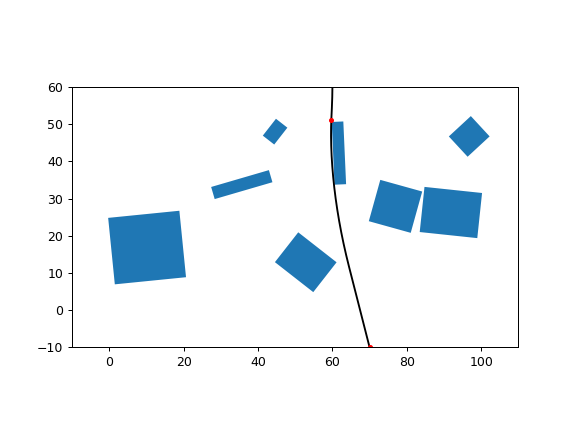

---
{'pos': array([ 70, -10]), 'state': [], 'fcost': 14.142135623730951, 'gcost': inf, 'hcost': inf, 'neighbors': [], 'opened': False, 'closed': False, 'next': 27, 'obstructed': array([], dtype=float64), 'edge': 0, 'isstart': True, 'id': 33} {'pos': array([ 59.70654108,  51.07530145]), 'state': array([ 0.09134631,  1.99791287]), 'fcost': 15.147328595690137, 'gcost': 2.760000000000002, 'hcost': 12.387328595690136, 'neighbors': [], 'opened': False, 'closed': False, 'next': 0, 'obstructed': array([], dtype=float64), 'edge': 0, 'isstart': False, 'id': 27}
---
{'pos': array([ 59.70654108,  51.07530145]), 'state': array([ 0.09134631,  1.99791287]), 'fcost': 15.147328595690137, 'gcost': 2.760000000000002, 'hcost': 12.387328595690136, 'neighbors': [], 'opened': False, 'closed': False, 'next': 0, 'obstructed': array([], dtype=float64), 'edge': 0, 'isstart': False, 'id': 27} {'pos': array([60, 60]), 'state': array([ 0.,  1.]), 'fcost': 14.142135623730951, 'gcost': 0.0, 'hcost': inf, 'neighbors':

In [11]:
f, ax = plt.subplots(1,1)

plot_obs(plist, ax=ax)

#ax.plot(traj['x'][:,0], traj['x'][:,1], 'k-')
for s,g in zip(path_list[:-1],path_list[1:]):
    print("---")
    print(s, g)
    p1 = s['pos']
    p2 = g['pos']
    s2 = g['state']
    traj, gp = pg.fp_global_guidance(p1, numpy.hstack([p2, s2]), guidparam)
    # print(traj['v'], traj['psi'], g['state'])
    ax.plot(traj['x'][:,0], traj['x'][:,1], 'k-')
    ax.plot(traj['x'][0,0], traj['x'][0,1], 'r.')

ax.set_aspect('equal')

In [303]:
sg.start

{'closed': False,
 'edge': 0,
 'fcost': 12.0,
 'gcost': inf,
 'hcost': inf,
 'id': 17,
 'isstart': True,
 'neighbors': [],
 'next': 5,
 'obstructed': array([], dtype=float64),
 'opened': False,
 'pos': array([60,  0]),
 'state': []}

In [72]:
importlib.reload(fpg)

vobs = fpg.obs_from_data(obsdata, 0.0, 0.0)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
[]


ValueError: need at least one array to concatenate

In [64]:
obsdata

{'num': array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5,
        5, 6, 6, 6, 6, 7, 7, 7, 7]),
 'xpos': array([ 108.17253879,  100.7386197 ,   90.34657963,   97.78049872,
          39.76254453,   28.89570411,   22.59279044,   33.45963086,
          68.31592026,   66.61923574,   51.56928067,   53.2659652 ,
          64.0598696 ,   55.69190902,   44.8556105 ,   53.22357108,
          14.35111126,    9.5371091 ,   -1.77678393,    3.03721823,
          94.64861021,   88.40143145,   81.34159904,   87.5887778 ,
          82.45973297,   76.63767103,   70.39052883,   76.21259078,
          20.75090063,    6.80514428,    0.21672618,   14.16248253]),
 'ypos': array([ 36.66405735,  46.11734322,  37.94520221,  28.49191635,
         18.98611168,  33.42623494,  28.6830097 ,  14.24288645,
         31.46723157,  38.79520861,  35.31061446,  27.98263743,
         13.2470279 ,  22.48732056,  12.67402544,   3.43373278,
         36.12794592,  39.50963116,  23.40372489,  20.0220396